In [1]:
%matplotlib inline
%run ../../path_import.py
from plots import *
from training import *
from eubo import *
from model_naive_natparam import *

import probtorch
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
data_path = "../gmm_dataset_c2k"
Data = torch.from_numpy(np.load(data_path + '/obs.npy')).float()
_, N, D = Data.shape
K = 3 ## number of clusters
## Model Parameters
SAMPLE_SIZE = 10
NUM_HIDDEN_LOCAL = 64
## Training Parameters
BATCH_SIZE = 20
NUM_EPOCHS = 2000
LEARNING_RATE = 1e-4
CUDA = torch.cuda.is_available()
PATH = 'oneshot-init-eta-c2k'

DEVICE = torch.device('cuda:1')

In [3]:
enc_eta, enc_z, optimizer = initialize(K, D, NUM_HIDDEN_LOCAL, CUDA, DEVICE, LEARNING_RATE)

In [4]:
enc_eta.load_state_dict(torch.load('../weights/enc-eta-%s' + PATH))
enc_z.load_state_dict(torch.load('../weights/enc-z-%s' + PATH))

In [ ]:
train(Eubo_init_eta, enc_eta, enc_z, optimizer, Data, K, NUM_EPOCHS, SAMPLE_SIZE, BATCH_SIZE, PATH, CUDA, DEVICE)

In [ ]:
# torch.save(enc_eta.state_dict(), '../weights/enc-eta-%s' + PATH)
# torch.save(enc_z.state_dict(), '../weights/enc-z-%s' + PATH)

In [5]:
BATCH_SIZE_TEST = 50
obs, q_eta, q_z = test(Eubo_init_eta, enc_eta, enc_z, Data, K, SAMPLE_SIZE, BATCH_SIZE_TEST, CUDA, DEVICE)

CPU times: user 3.23 s, sys: 29.3 ms, total: 3.26 s
Wall time: 3.29 s


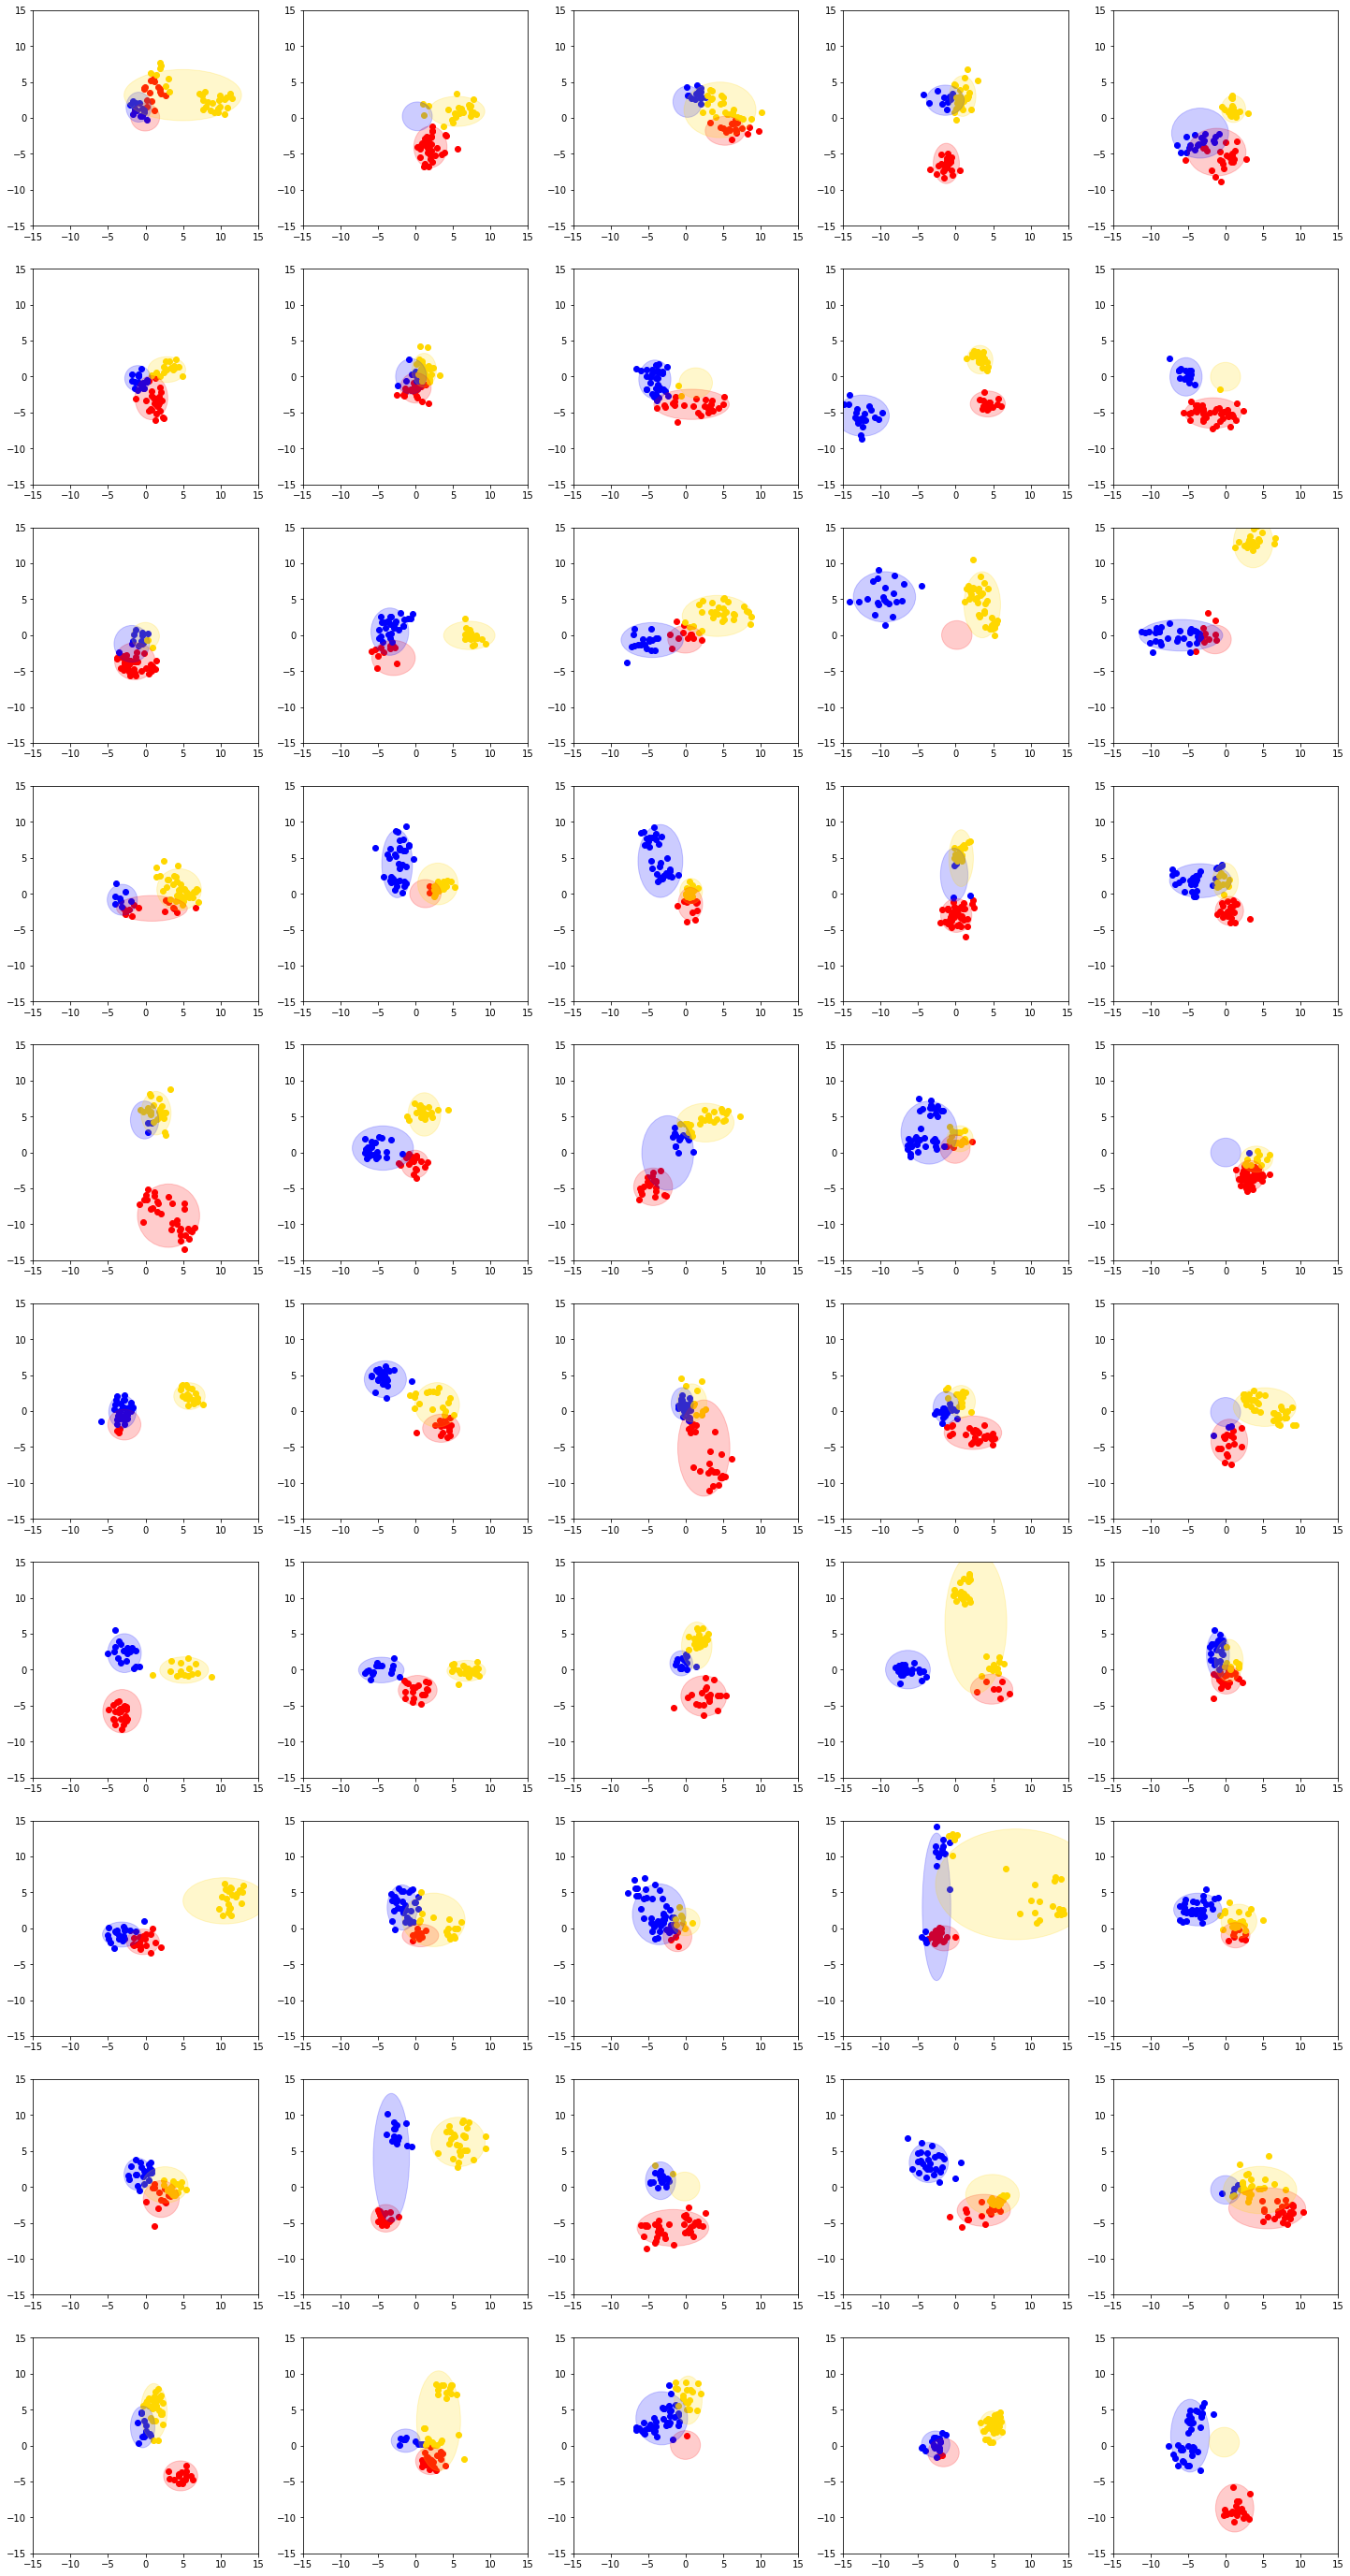

In [6]:
%time plot_samples(obs, q_eta, q_z, PATH)